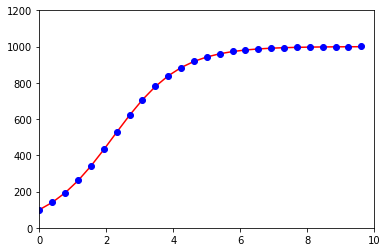

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpmath import mp, mpf, exp
import seaborn as sns  
from scipy.stats import norm
import random
from statsmodels.graphics.tsaplots import plot_acf

# Random Walk MCMC Metropolis Hastin
#GRAFICA ANALITICA CON LAS PRIMERAS SIMULACIONES.


#Creamos la función 
k=1000
l=1
xo=100
rr= np.arange(0,10,10/26)
def ecua(t):    #solución analitica de la ecs dif. 
  a=xo*k*math.exp(l*t)
  b=k+xo*(math.exp(l*t)-1)
  return(a/b)

lista=list(range(26))   #vamos a generar 26 observaciones espaciadas uniformemente en (0,10 )

for i in range(26):
    lista[i]=ecua(rr[i])  #evaluamos la funcion en cada punto de rr  para graficarlo posteriormente

#Datos de la solucion sin ruido. 
listar = np.array(lista)
#agregamos ruido al lista, del normal cero uno. 
listare=listar+np.random.normal(0,1,26)
plt.plot(rr, listar, "r")
plt.plot(rr,listare, "ob")
plt.xlim(0,10)
plt.ylim(0,1200)
plt.show()
c=np.around(rr,6).reshape(26,1)
d=np.around(listare,6).reshape(26,1)

In [ ]:
#Programar la función con las transformaciones logaritmica.
def ecua3(t,l,k):
  a=xo*k*math.exp(l*t)
  b=k+xo*(math.exp(l*t)-1)
  return(a/b)

def likelihood3l(l,k):
  r=0
  for i in range(len(d)):
    r=r+(float(d[i])-ecua3(float(c[i]),l,k))**2
  return(-1/2*(r+(k-965)**2)-l)  #MEDIA DE LA NORMAL


def RWMHAlb(muestra, burnin,lag,ini):  # nos devuelve la cadena bruta
  mylist = ini
  aceptaciones=0
  n=0
  for i in range(burnin+  lag*muestra):
    propuesta=ini+np.array([float(np.random.normal(0,0.1,1)),float(np.random.normal(0,3,1))])  #propuestas
    hoodp=likelihood3l(propuesta[0,0],propuesta[0,1])
    hoodi=likelihood3l(ini[0,0],ini[0,1])
    ro=min(1,np.exp(np.float128(hoodp-hoodi)))
    n=n+1
    if random.random() < ro:
      mylist=np.r_[mylist,propuesta]
      ini=propuesta
      aceptaciones=aceptaciones+1
    else:
      mylist=np.r_[mylist,ini]
  return(aceptaciones)
  #return(np.r_[np.array([[aceptaciones/(burnin+lag*muestra),0]]),mylist])

Se observan lags, cercanos al valor 750

In [ ]:
#corremos el programa 10 mil veces para ver las autocorrelaciones
cadbrutl=RWMHAlb(10,0,1000,np.array([[0,200]]))

from matplotlib import pyplot
plot_acf(cadbrutl[2:len(cadbrutl),0],lags=len(cadbrutl[2:len(cadbrutl),0])-1)  #primer punto es el porccentaje de acep. y el 2, es el pto inicial.
plt.xlim(0,2000)
plt.title("autocorrelaciones de lambda")
pyplot.show()


346

In [ ]:
plot_acf(cadbrutl[2:len(cadbrutl),1],lags=len(cadbrutl[2:len(cadbrutl),0])-1)  #primer punto es el porccentaje de acep. y el 2, es el pto inicial.
plt.xlim(0,2000)
plt.title("autocorrelaciones de Kappa")
pyplot.show()

10002

Text(0.5, 1.0, 'muestra de 100, con log verosimilitu')

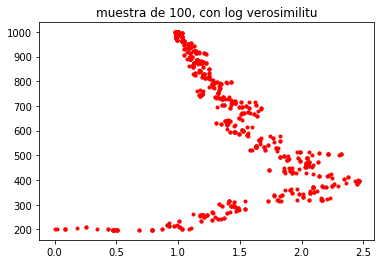

In [ ]:
#observemos el recorrido 
plt.plot(cadbrutl[2:len(cadbrutl),0], cadbrutl[2:len(cadbrutl),1], ".r")
plt.title("muestra bruta.")

(0, 3000)

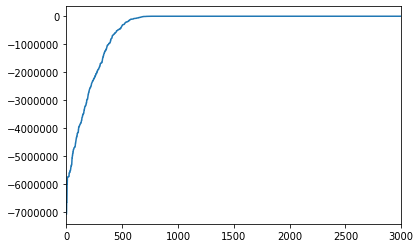

In [ ]:
densidad1 = np.zeros(10000,dtype=float)
for i in range(10000):
  densidad1[i]=likelihood3l(cadbrutl[(i+2),0],cadbrutl[(i+2),1])

plt.plot(densidad1)
plt.xlim(0,3000)


Los resultados siguientes muestran cierta convergencia para un lag de 700, y un burn in  de 1500

In [ ]:
##La siguiente función devuelve la muestra final. 
def RWMHAl(muestra, burnin,lag,ini):
  mylist = ini
  aceptaciones=0
  n=0
  for i in range(burnin+lag*muestra):
    propuesta=ini+np.array([float(np.random.normal(0,0.1,1)),float(np.random.normal(0,3,1))])  #propuestas
    hoodp=likelihood3l(propuesta[0,0],propuesta[0,1])
    hoodi=likelihood3l(ini[0,0],ini[0,1])
    ro=min(1,np.exp(np.float128(hoodp-hoodi)))
    n=n+1
    if random.random() < ro:
      ini=propuesta
      aceptaciones=aceptaciones+1
      if n >= burnin and (n-burnin) % lag == 0:
        mylist=np.r_[mylist,propuesta]       
    elif n >= burnin and (n-burnin) % lag == 0:
      mylist=np.r_[mylist,ini]
  return(np.r_[np.array([[aceptaciones/(burnin+lag*muestra),0]]),mylist])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


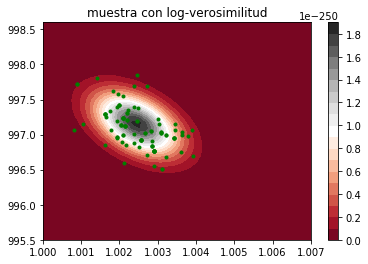

In [ ]:
muestra1=RWMHAl(100,1500,750,np.array([[0,200]]))

def ecualc(t,l,k):
  np_exp = np.frompyfunc(mp.exp, 1, 1)
  a=xo*k*np_exp(l*t)
  b=k+xo*(np_exp(l*t)-1)
  return(a/b)

def curvas(l,k):
  r=0
  np_exp = np.frompyfunc(mp.exp, 1, 1)
  for i in range(26):
    r=r+(float(d[i])-ecualc(float(c[i]),l,k))**2
    
  return(np_exp(-1/2*(r+(k-965)**2)-l))  #MEDIA DE LA NORMAL



x=np.linspace(1,1.007,40)
y=np.linspace(995.5,998.6,40)
X,Y =np.meshgrid(x,y)
Z=curvas(X,Y)

a=plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.plot(muestra1[2:len(muestra1),0], muestra1[2:len(muestra1),1], ".g")
plt.title("muestra con log-verosimilitud")
plt.colorbar();


Las autocorrelaciones al final son

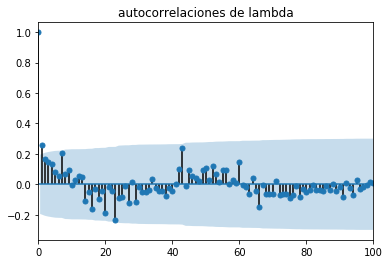

In [ ]:
plot_acf(muestra1[2:len(muestra1),0],lags=len(muestra1[2:len(muestra1),0])-1)  #primer punto es el porccentaje de acep. y el 2, es el pto inicial.
plt.xlim(0,100)
plt.title("autocorrelaciones de lambda")
pyplot.show()t


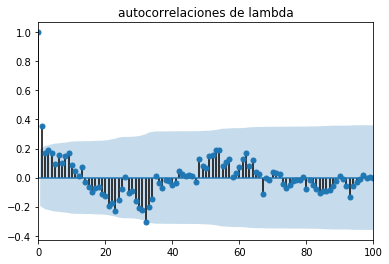

In [ ]:
plot_acf(muestra1[2:len(muestra1),1],lags=len(muestra1[2:len(muestra1),0])-1)  #primer punto es el porccentaje de acep. y el 2, es el pto inicial.
plt.xlim(0,100)
plt.title("autocorrelaciones de lambda")
pyplot.show()
